In [2]:
import pandas as pd
import matplotlib.pyplot as plt
excel_file = 'Linares Lopez_Ferral.xlsx'
#Df base. Tosos los datos
df = pd.read_excel(excel_file, header=0)
print(df.head())


           Periodista   Posicion    Formato Archivo            Tema 1 Tema 2  \
0  María Elena Ferral  Reportero  Reportaje   Texto          Noticias    NaN   
1  María Elena Ferral  Reportero  Reportaje   Texto         Educación    NaN   
2  María Elena Ferral  Reportero  Reportaje   Texto  Cultura/Sociedad    NaN   
3  María Elena Ferral  Reportero  Reportaje   Texto  Cultura/Sociedad    NaN   
4  María Elena Ferral  Reportero  Reportaje   Texto  Cultura/Sociedad    NaN   

  Sección         Etiquetas  \
0   Local             Local   
1   Local  Educación, local   
2   Local    Cultura, local   
3   Local    Cultura, local   
4   Local    Cultura, local   

                                              Título             Medio  ...  \
0      Colectan focos para iluminar parque papanteco  Diario de Xalapa  ...   
1  Reanudan clases en primaria de Papantla; quita...  Diario de Xalapa  ...   
2  Afinan detalles en Papantla para el Día de Mue...  Diario de Xalapa  ...   
3  Con el Xantol

Numero de textos por tema


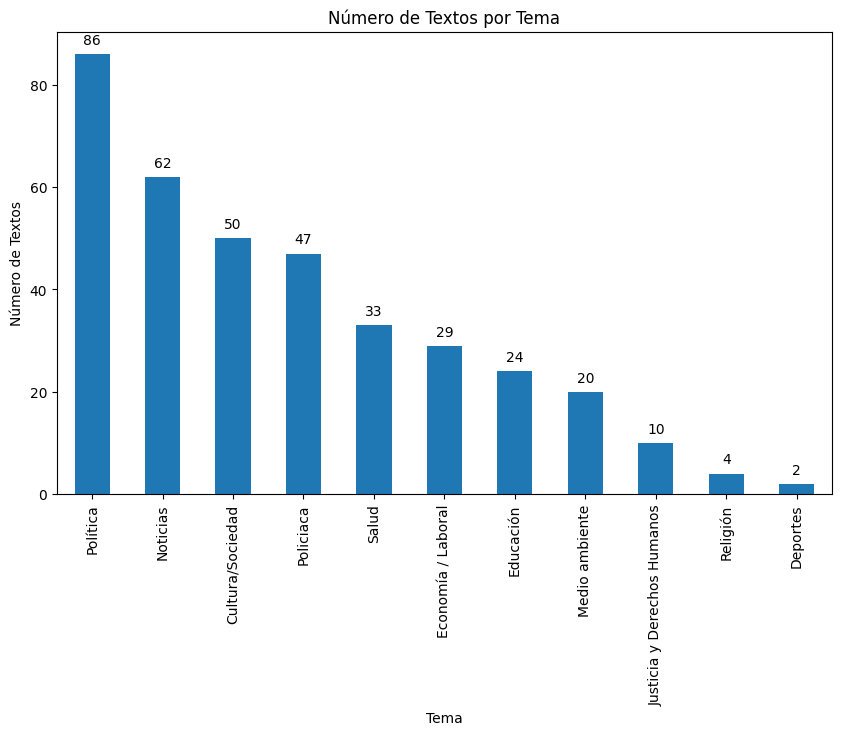

In [3]:
#Observaciones respecto a la base de datos
print('Numero de textos por tema')
conteo_temas = df['Tema 1'].value_counts()

#Grafica de barras
plt.figure(figsize=(10,6))
ax = conteo_temas.plot(kind='bar')
plt.title('Número de Textos por Tema')
plt.xlabel('Tema')
plt.ylabel('Número de Textos')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Mostrar la gráfica
plt.show()


In [4]:
print(df.columns)

Index(['Periodista', 'Posicion', 'Formato', 'Archivo', 'Tema 1', 'Tema 2',
       'Sección', 'Etiquetas', 'Título', 'Medio', 'FDP (aaaa-mm-dd)', 'Enlace',
       'Wayback Machine', 'archive.today', 'Captura PNG', 'Página descargada',
       'Google Drive', 'Texto', 'Localidad', 'Municipio', 'Entidad',
       'CVE_INEGI', 'CVE_ENT', 'CVE_MUN', 'CVE_LOC', 'Compilación',
       'Coautores', 'Notas', 'Duración del video (hh:mm:ss)'],
      dtype='object')


                             count        mean         std    min     25%  \
Tema 1                                                                      
Cultura/Sociedad              50.0  303.460000  211.322001    1.0  175.75   
Deportes                       2.0   36.000000    7.071068   31.0   33.50   
Economía / Laboral            29.0  349.206897  359.574687   33.0  178.00   
Educación                     24.0  293.416667  170.220807  110.0  215.50   
Justicia y Derechos Humanos   10.0  473.500000  271.848508   79.0  334.25   
Medio ambiente                20.0  303.700000   93.633721  170.0  245.00   
Noticias                      62.0  299.629032  241.214905    5.0  187.75   
Policiaca                     47.0  286.851064  136.480127  100.0  202.50   
Política                      86.0  611.383721  442.288864  150.0  289.00   
Religión                       4.0  316.000000   77.364936  249.0  255.00   
Salud                         33.0  296.606061  143.592292   26.0  246.00   

<Figure size 1000x600 with 0 Axes>

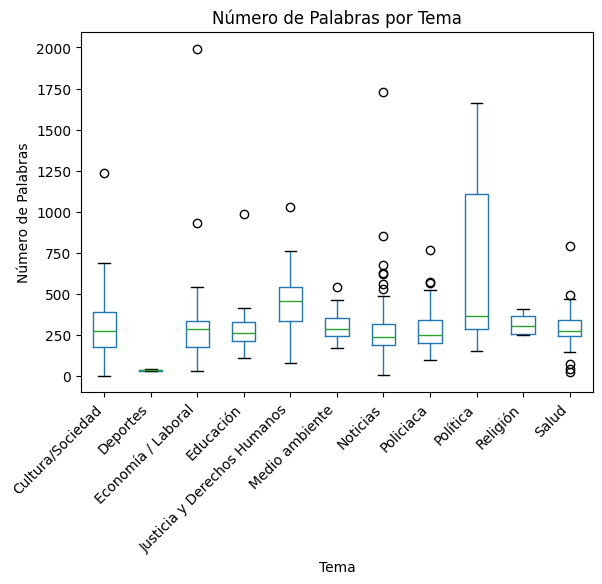

In [5]:
#Analisis de la longitud de los textos por tema

#Funcion para contar palabras
def contar_palabras(texto):
    return len(texto.split())

#Se agrega una columna con la longitud de los textos

df['num_palabras'] = df['Texto'].apply(lambda x: contar_palabras(str(x)))
longitud_por_tema = df.groupby('Tema 1')
print(longitud_por_tema['num_palabras'].describe())


#Grafica de cajas
plt.figure(figsize=(10,6))
df.boxplot(column='num_palabras', by='Tema 1', grid=False)
plt.title('Número de Palabras por Tema')
plt.suptitle('')
plt.xlabel('Tema')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Número de Palabras')
plt.show()

                             count       mean       std  min   25%  50%  \
Tema 1                                                                    
Cultura/Sociedad              50.0   6.360000  3.444961  1.0  5.00  6.0   
Deportes                       2.0   2.000000  0.000000  2.0  2.00  2.0   
Economía / Laboral            29.0   9.137931  8.728951  2.0  6.00  7.0   
Educación                     24.0   7.333333  3.795497  2.0  5.00  7.0   
Justicia y Derechos Humanos   10.0  10.200000  5.050853  3.0  7.00  9.0   
Medio ambiente                20.0   6.650000  1.871532  4.0  5.00  6.0   
Noticias                      62.0   7.854839  4.994577  1.0  6.00  7.0   
Policiaca                     47.0   8.382979  3.802477  4.0  6.00  7.0   
Política                      86.0   9.267442  5.931817  5.0  6.00  8.0   
Religión                       4.0   7.000000  2.708013  5.0  5.75  6.0   
Salud                         33.0  10.000000  6.174545  2.0  6.00  8.0   

                        

<Figure size 1000x600 with 0 Axes>

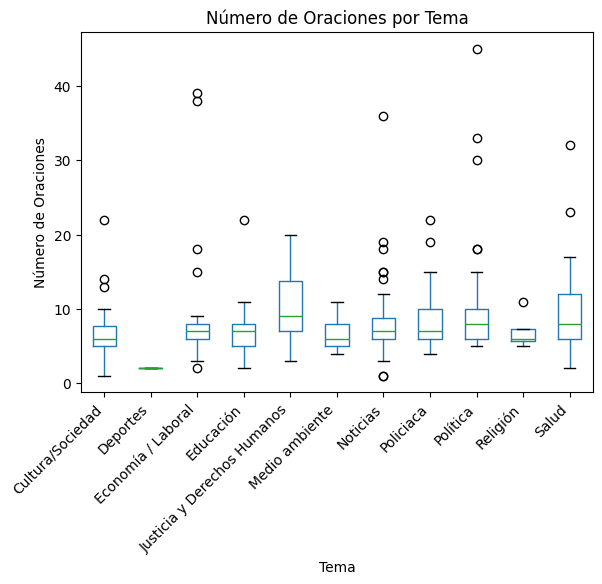

In [6]:
#Funcion para contar oraciones
def contar_oraciones(texto):
    return len(texto.split('.'))
#Se agrega una columna con la longitud de los textos
df['num_oraciones'] = df['Texto'].apply(lambda x: contar_oraciones(str(x)))
longitud_por_tema = df.groupby('Tema 1')
print(longitud_por_tema['num_oraciones'].describe())

#Grafica de cajas
plt.figure(figsize=(10,6))
df.boxplot(column='num_oraciones', by='Tema 1', grid=False)
plt.title('Número de Oraciones por Tema')
plt.suptitle('')
plt.xlabel('Tema')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Número de Oraciones')
plt.show()


                             count       mean        std        min  \
Tema 1                                                                
Cultura/Sociedad              50.0  46.072212  21.041776   1.000000   
Deportes                       2.0  18.000000   3.535534  15.500000   
Economía / Laboral            29.0  40.282694  17.532392  14.285714   
Educación                     24.0  42.473988  16.212848  20.375000   
Justicia y Derechos Humanos   10.0  45.286905  13.245071  26.333333   
Medio ambiente                20.0  46.283276   9.401775  33.142857   
Noticias                      62.0  37.247158  14.067831   5.000000   
Policiaca                     47.0  35.276691  11.319032  15.600000   
Política                      86.0  72.502479  55.956233   9.644444   
Religión                       4.0  47.774242  14.604027  37.363636   
Salud                         33.0  32.524799  12.380998   9.294118   

                                   25%        50%         75%         max  


<Figure size 1000x600 with 0 Axes>

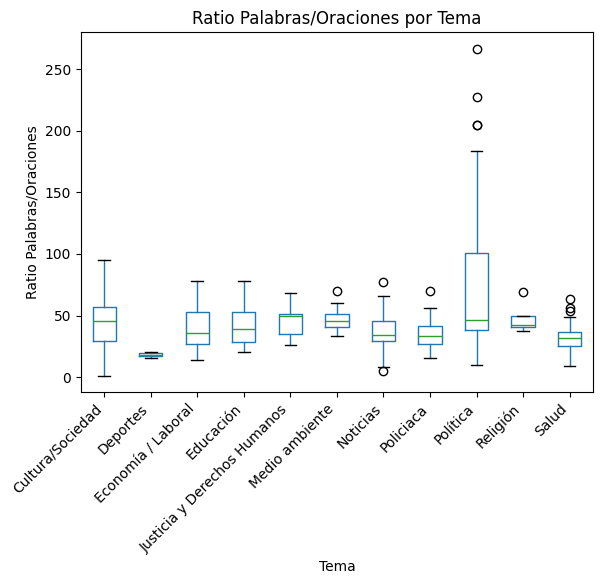

In [7]:

#Ratio entre el número de palabras y el número de oraciones
df['ratio_palabras_oraciones'] = df['num_palabras']/df['num_oraciones']
ratio_por_tema = df.groupby('Tema 1')
print(ratio_por_tema['ratio_palabras_oraciones'].describe())

#Grafica de cajas
plt.figure(figsize=(10,6))
df.boxplot(column='ratio_palabras_oraciones', by='Tema 1', grid=False)
plt.title('Ratio Palabras/Oraciones por Tema')
plt.suptitle('')
plt.xlabel('Tema')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Ratio Palabras/Oraciones')
plt.show()



Mencion Partido Politico
False    440
True     167
Name: count, dtype: int64
Mencion Partido Politico        False     True 
Tema 1                                         
Cultura/Sociedad             0.980000  0.020000
Deportes                     1.000000       NaN
Economía / Laboral           0.931034  0.068966
Educación                    0.958333  0.041667
Justicia y Derechos Humanos  0.800000  0.200000
Medio ambiente               1.000000       NaN
Noticias                     0.967742  0.032258
Policiaca                    0.936170  0.063830
Política                     0.232558  0.767442
Religión                     1.000000       NaN
Salud                        0.787879  0.212121


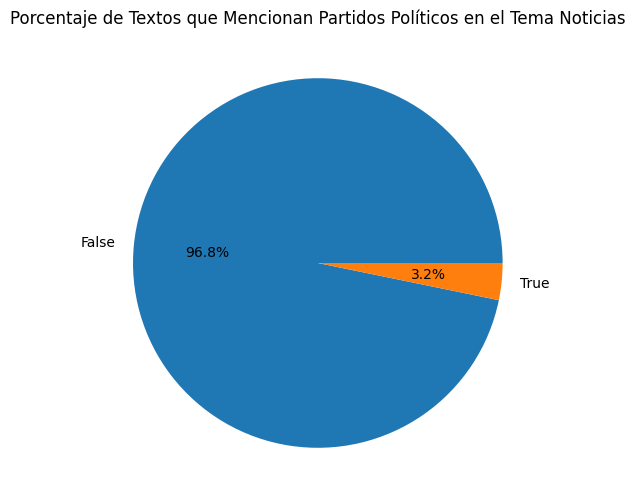

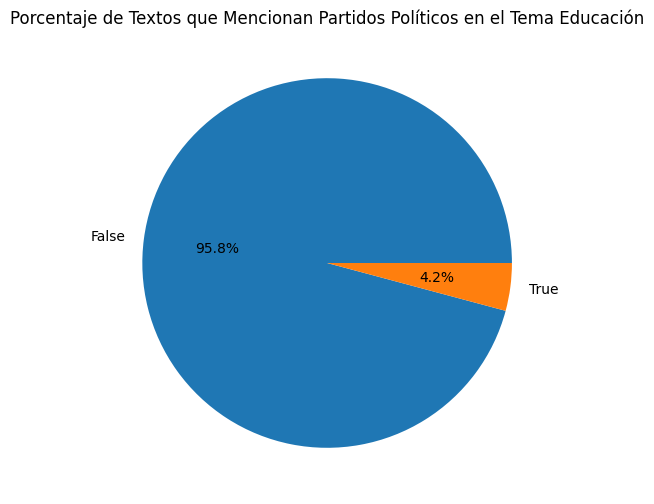

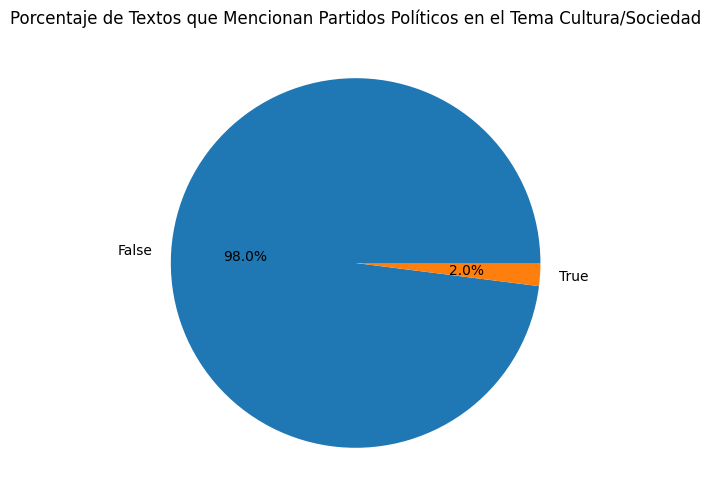

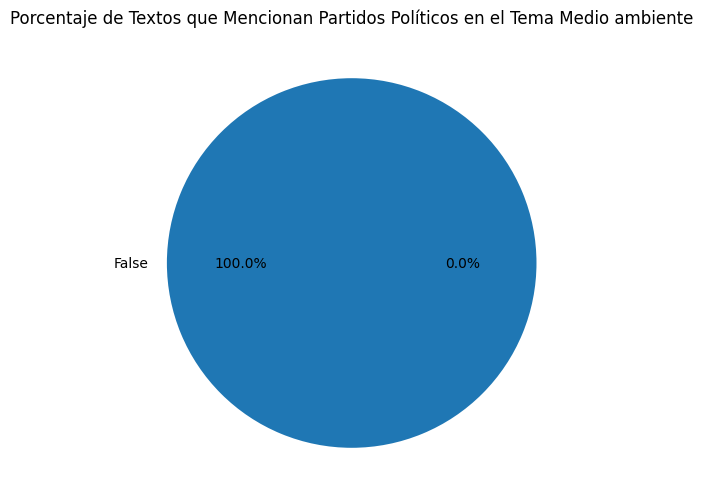

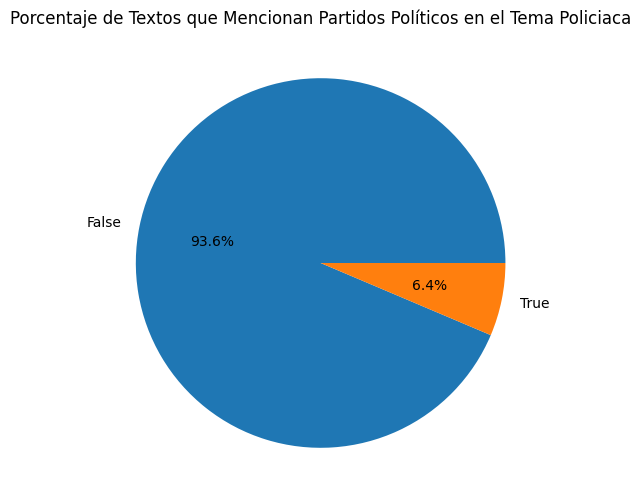

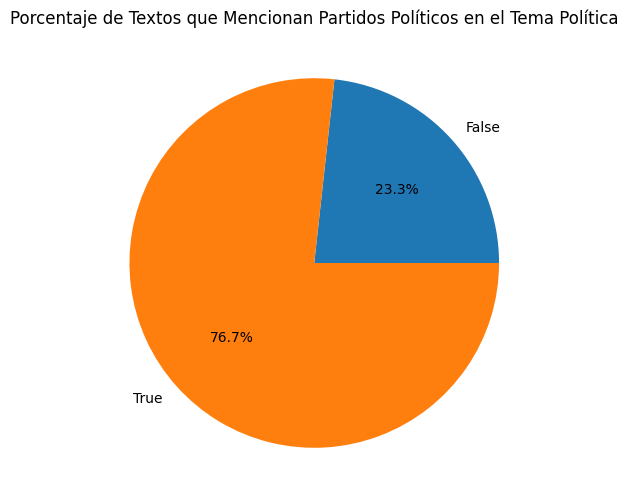

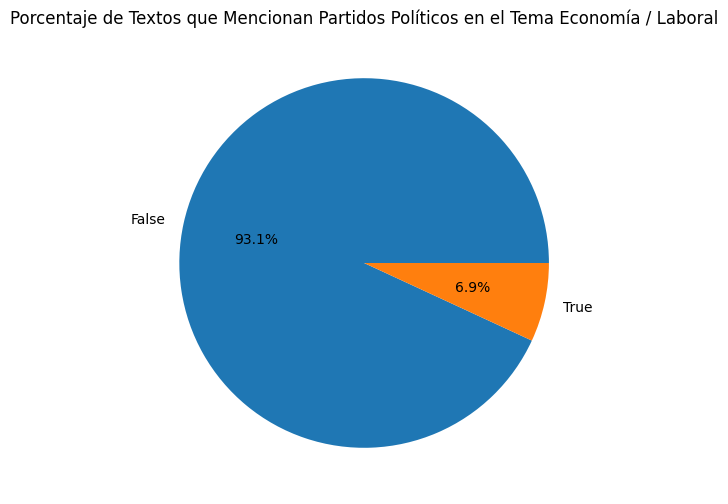

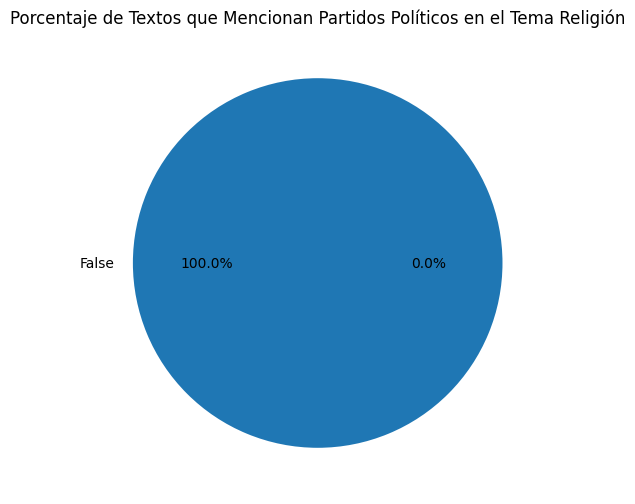

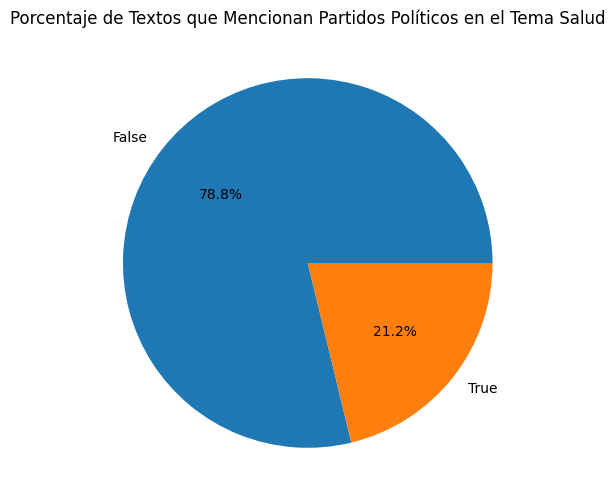

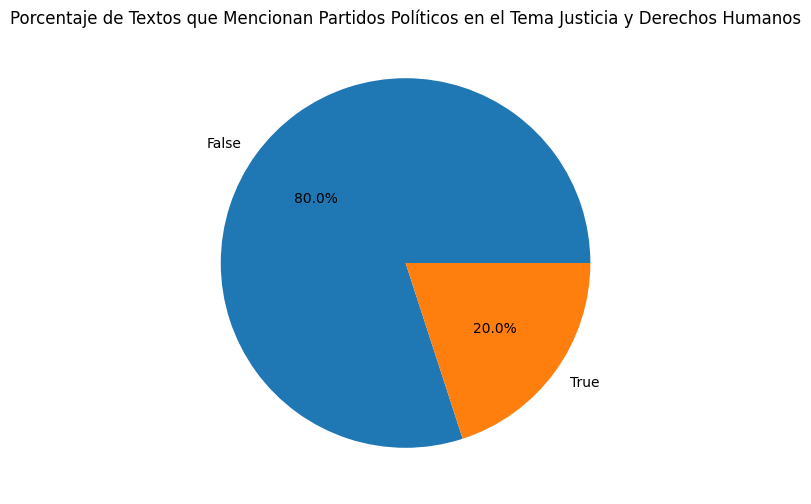

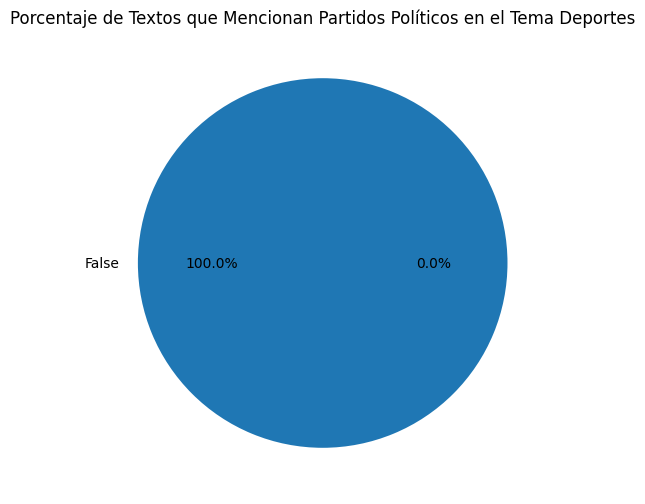

Tema 1                       Mencion Partido Politico
Cultura/Sociedad             False                       49
                             True                         1
Deportes                     False                        2
Economía / Laboral           False                       27
                             True                         2
Educación                    False                       23
                             True                         1
Justicia y Derechos Humanos  False                        8
                             True                         2
Medio ambiente               False                       20
Noticias                     False                       60
                             True                         2
Policiaca                    False                       44
                             True                         3
Política                     True                        66
                             False            

In [8]:
#Analisis de uso de palabras clave

#creamos un df copia
df_palabras_clave = df

#Mención de partidos políticos
lista_partidos_politicos = ['Morena', 'PAN', 'PRI', 'PRD', 'PT', 'PVEM', 'MC', 'PES', 'RSP']


def texto_menciona_partido(texto):
    for partido in lista_partidos_politicos:
        if partido in texto:
            return True
    return False

#Contiene o no cada partido político

df_palabras_clave['Mencion Partido Politico']=df_palabras_clave['Texto'].apply(lambda x: texto_menciona_partido(str(x)))

print(df_palabras_clave['Mencion Partido Politico'].value_counts())


#Porcentaje de textos que mencionan a cada partido político
mencion_partido_temas=df_palabras_clave.groupby('Tema 1')['Mencion Partido Politico'].value_counts(normalize=True).unstack()

print(mencion_partido_temas)

#Graficos de pie

for tema in df['Tema 1'].dropna().unique():
    
    plt.figure(figsize=(10,6))
    mencion_partido_temas.loc[tema].plot(kind='pie', autopct='%1.1f%%')
    plt.title('Porcentaje de Textos que Mencionan Partidos Políticos en el Tema {}'.format(tema))
    plt.ylabel('')
    plt.show()


mencion_partido_temas_barras_agrupadas=df_palabras_clave.groupby('Tema 1')['Mencion Partido Politico'].value_counts()
print(mencion_partido_temas_barras_agrupadas)



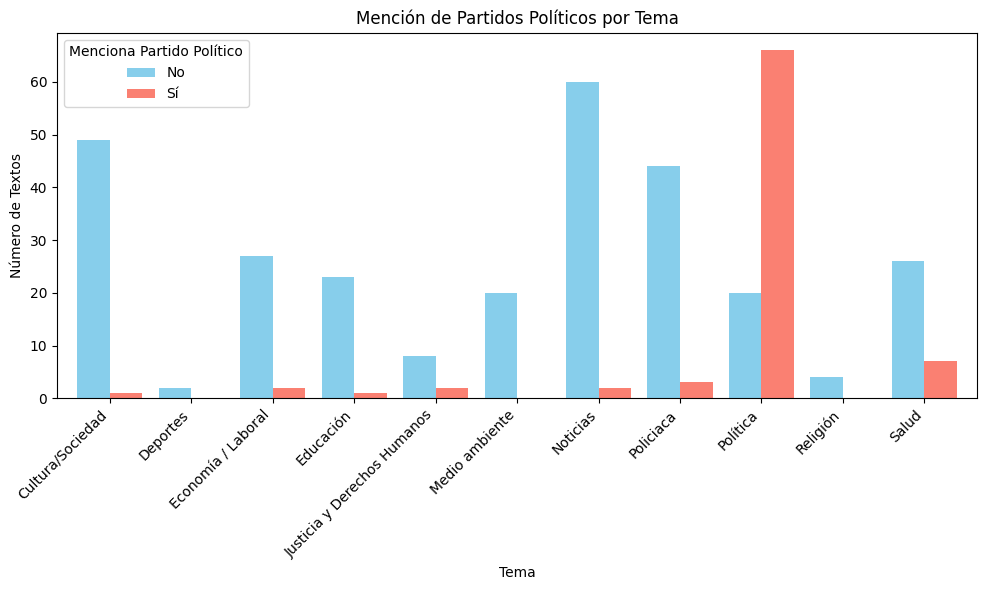

In [9]:

# Agrupar por tema y mención de partido político
mencion_partido_temas_barras_agrupadas = df_palabras_clave.groupby(['Tema 1', 'Mencion Partido Politico']).size().unstack(fill_value=0)

# Crear un gráfico de barras agrupadas
ax = mencion_partido_temas_barras_agrupadas.plot(kind='bar', 
                                                 figsize=(10, 6), 
                                                 color=['skyblue', 'salmon'],  # Colores diferentes para True y False
                                                 width=0.8)

# Ajustar etiquetas del eje X para que solo muestren el tema (sin True/False)
ax.set_xticklabels(mencion_partido_temas_barras_agrupadas.index, rotation=45, ha='right')

# Añadir título y etiquetas a los ejes
plt.title('Mención de Partidos Políticos por Tema')
plt.xlabel('Tema')
plt.ylabel('Número de Textos')

# Añadir leyenda
plt.legend(title='Menciona Partido Político', labels=['No', 'Sí'])

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar el gráfico
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariajosevelazquez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


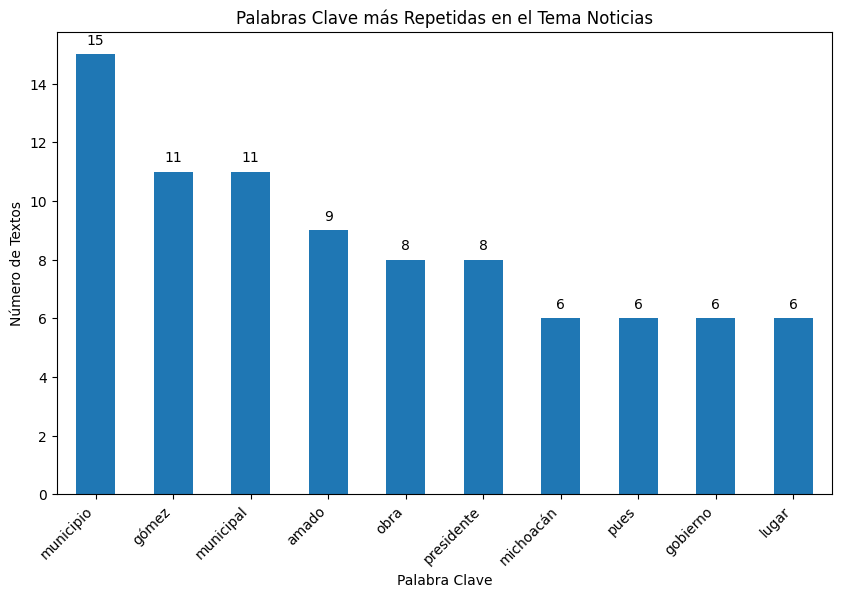

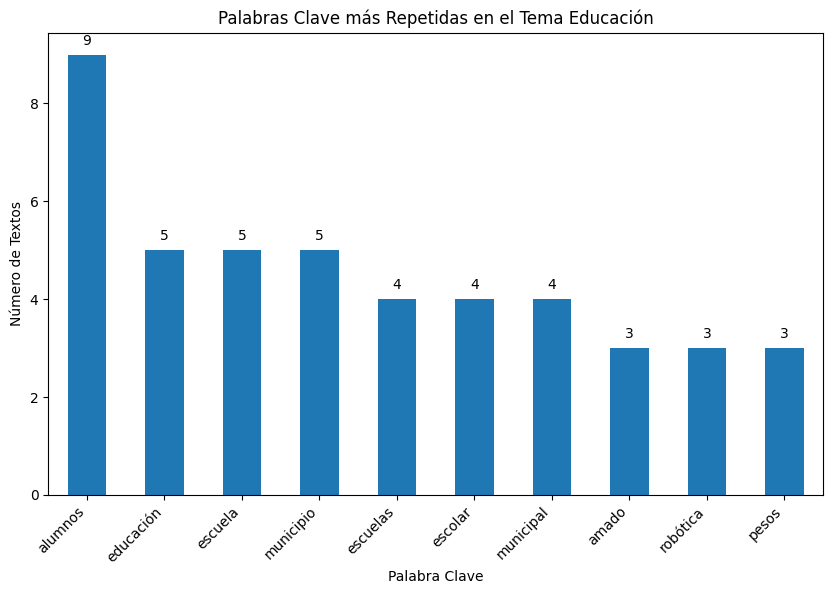

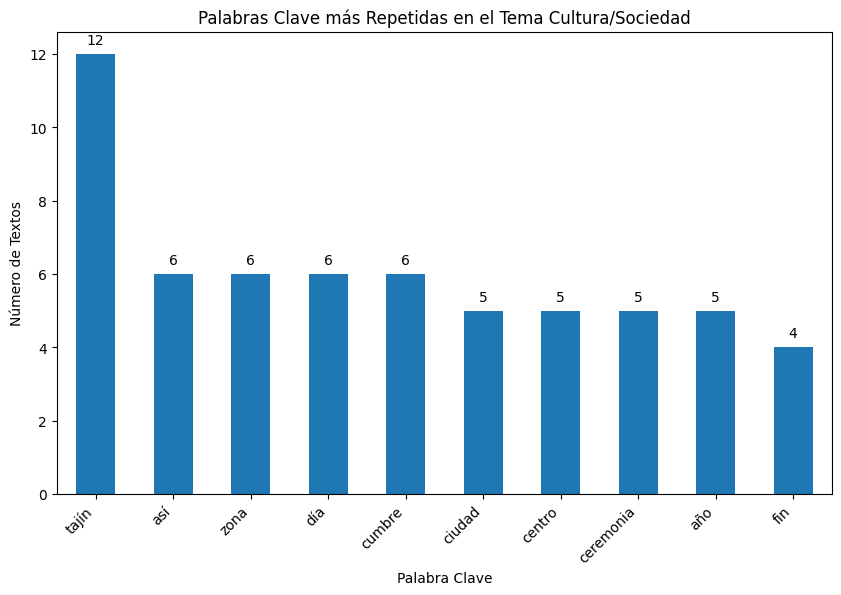

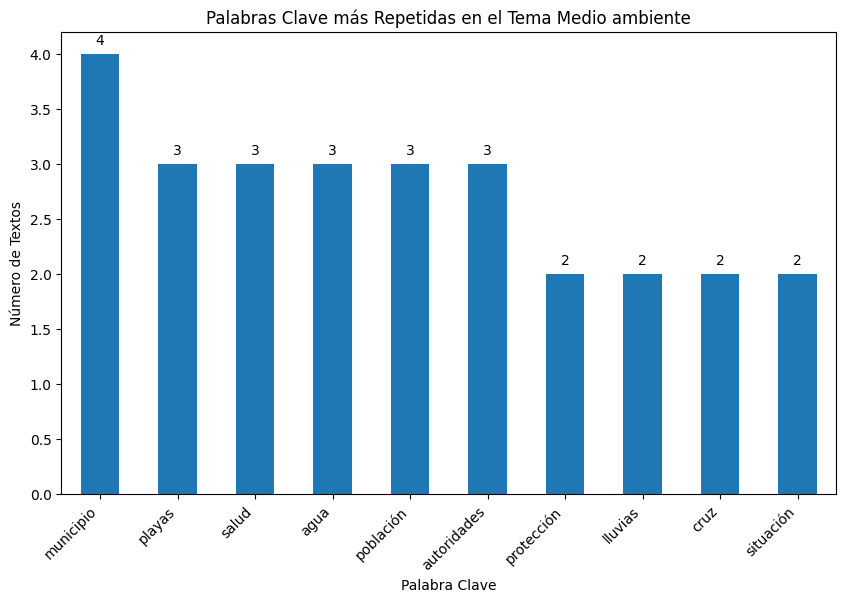

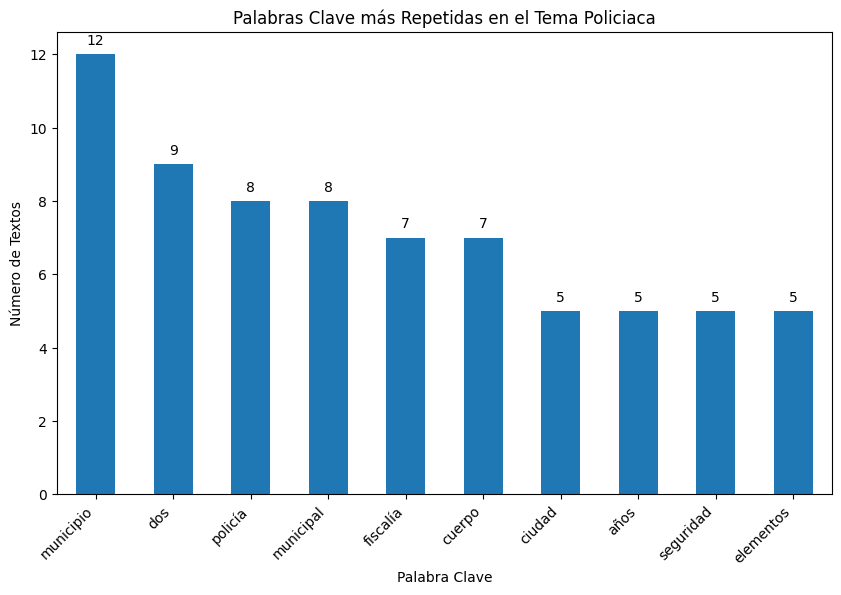

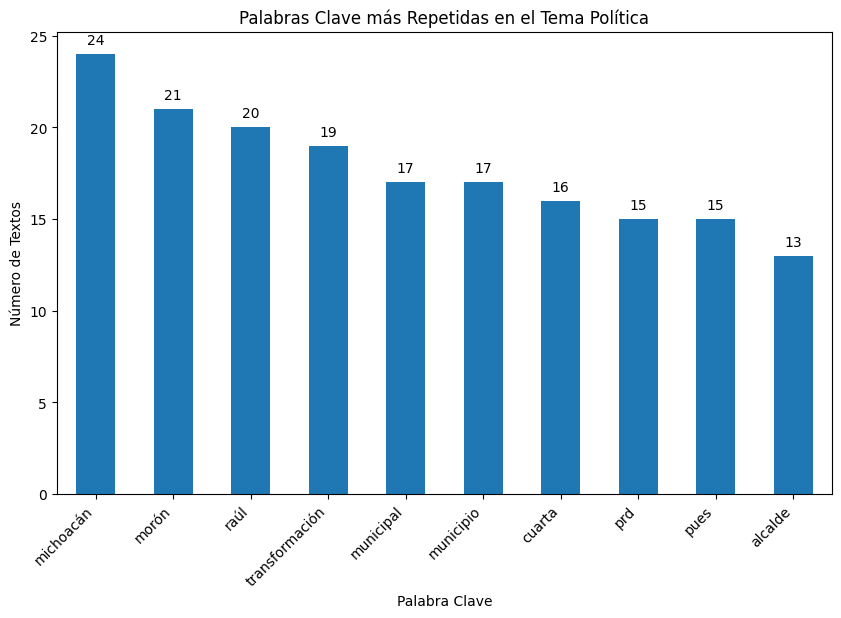

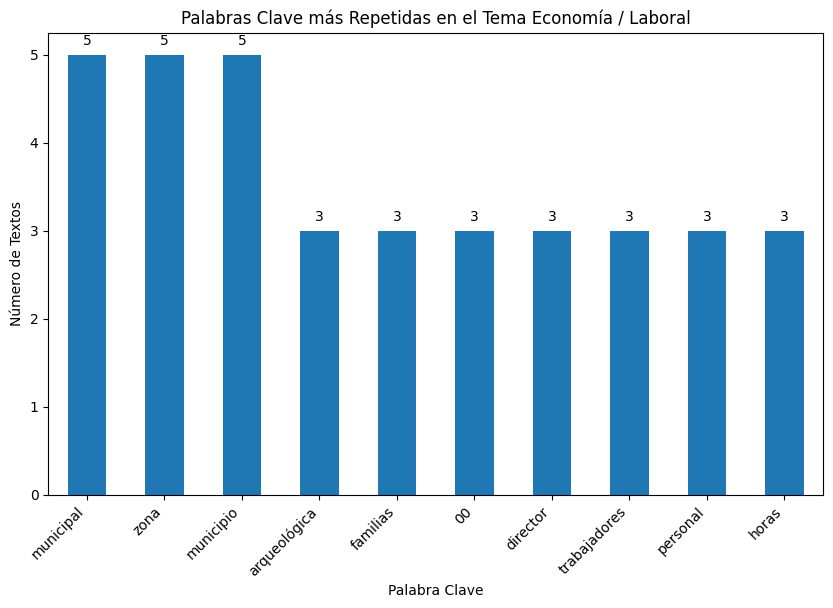

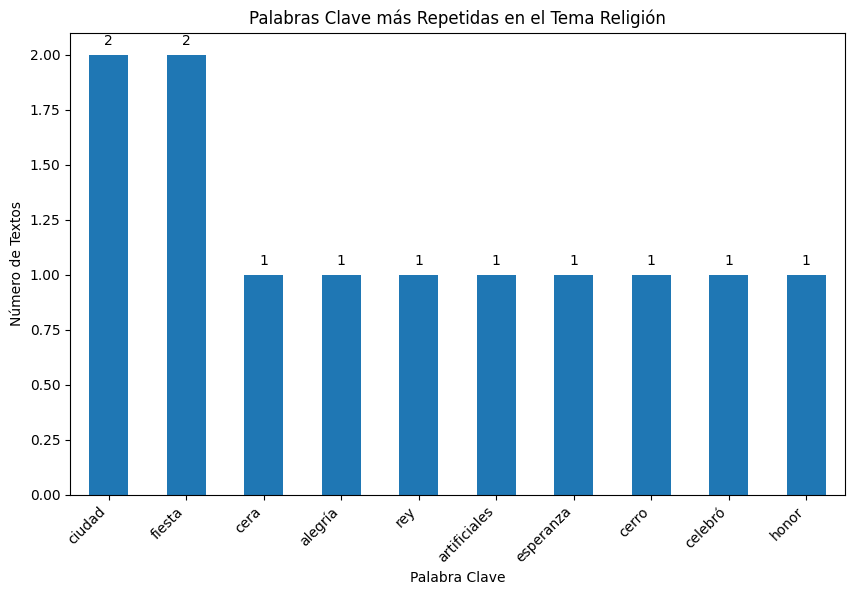

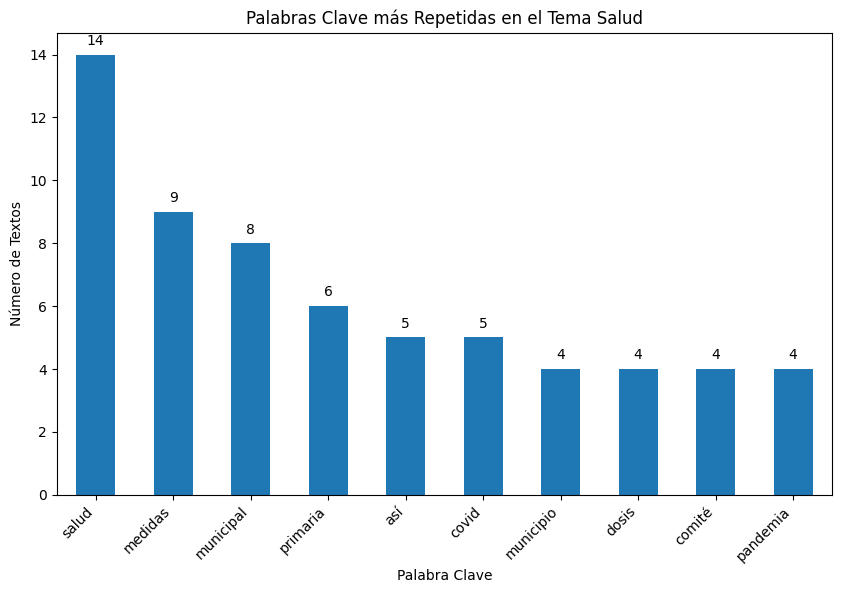

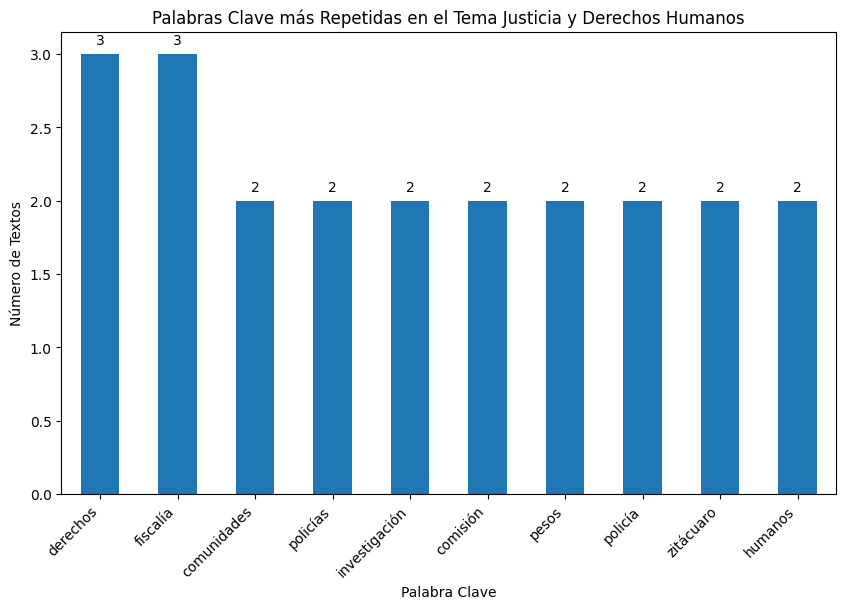

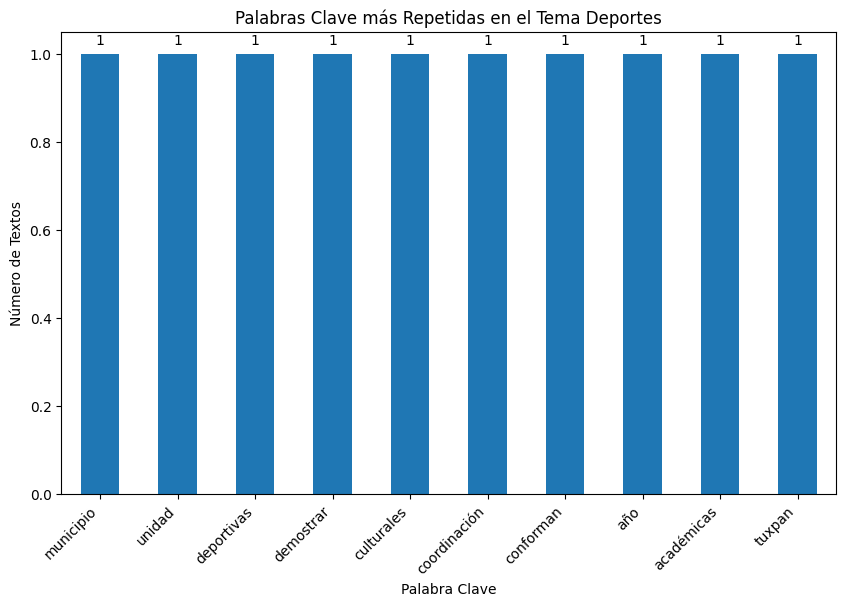

In [10]:
import palabrasClave

#creamos una columna con las palabras clave
df_palabras_clave['Palabras Clave'] = df_palabras_clave['Texto'].apply(lambda x: palabrasClave.get_keywords_by_tfidf(str(x)))

#funcion que analiza cuales palabras clave son las más repetidas por tema
def palabras_clave_mas_repetidas_por_tema(tema, n_palabras):
    palabras_clave = df_palabras_clave[df_palabras_clave['Tema 1'] == tema]['Palabras Clave']
    palabras_clave = palabras_clave.sum()
    conteo_palabras_clave = pd.Series(palabras_clave).value_counts()
    return conteo_palabras_clave.head(n_palabras)

#Palabras clave más repetidas por tema graficadas
for tema in df['Tema 1'].dropna().unique():
    palabras_clave = palabras_clave_mas_repetidas_por_tema(tema, 10)
    plt.figure(figsize=(10,6))
    ax = palabras_clave.plot(kind='bar')
    plt.title('Palabras Clave más Repetidas en el Tema {}'.format(tema))
    plt.xlabel('Palabra Clave')
    plt.ylabel('Número de Textos')
    plt.xticks(rotation=45, ha='right')
    for p in ax.patches:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.show()



In [24]:
#numero de textos que mencionan el nombre de su categoria en el texto

def menciona_categoria(row):
    return row['Tema 1'] in row['Texto']
        

df_mencion_categoria_propia_df = df_palabras_clave[['Texto', 'Tema 1']].copy()
df_mencion_categoria_propia_df.dropna(inplace=True)

df_mencion_categoria_propia_df['Mencion Categoria Propia'] = df_mencion_categoria_propia_df.apply(menciona_categoria, axis=1)
print(df_mencion_categoria_propia_df)


#Porcentaje de textos que mencionan su propia categoría
mencion_categoria_propia_temas=df_mencion_categoria_propia_df.groupby('Tema 1')['Mencion Categoria Propia'].value_counts(normalize=True).unstack()
print(mencion_categoria_propia_temas)

#Numero de textos que mencionan su propia categoría
mencion_categoria_propia_temas_barras_agrupadas=df_mencion_categoria_propia_df.groupby('Tema 1')['Mencion Categoria Propia'].value_counts()
print(mencion_categoria_propia_temas_barras_agrupadas)
#grafico de barras agrupadas





                                                 Texto  \
0    Debido a la “penumbra” en que se encontrabael ...   
1    Al confirmar la reanudación de clases apartir ...   
2    Ya empezaron las actividades en el Ninín 2016,...   
3    Para preservar las tradiciones sobre lacelebra...   
4    Este viernes arrancó el XII Concurso delFestiv...   
..                                                 ...   
602  En la Capilla de San Isidro, enclavada en la c...   
603  Después de dos largos años en los que la pande...   
604  En el marco de la conmemoración el Día Interna...   
605  Las jornadas académicas, culturales y deportiv...   
606  Continuando con la cartelera cultural dentro d...   

                          Tema 1  Mencion Categoria Propia  
0                       Noticias                     False  
1                      Educación                      True  
2               Cultura/Sociedad                     False  
3               Cultura/Sociedad                     False 